In [9]:
import pandas as pd
import ast 

# Read in predictions
df = pd.read_csv("/home/kopsahlong/eclair-agents/eclair/webpage_segmentation/grounding_eval/CogAgent/predictions/dataset_bb_labels_mind2web_cropped_quant_4.csv")

In [11]:
df

,original_image_path,label_path,description_label,element_type,original_bb,bb_x,bb_y,bb_width,bb_height,image_path,bb,model_response,predicted_bb,predicted_bb_yolo,is_center_within_gt_bb,is_overlap,iou
0,/media/nvme_data/eclair_agents/Mind2Web/new_da...,"[[0.5, 0.08368200836820083, 1.0, 0.16736401673...",'search cars' button,button,"[0.0, 0.134375, 0.06772044010537735, 0.20625, ...",0.134375,0.067720,0.206250,0.007438,/home/kopsahlong/eclair-agents/eclair/webpage_...,"[0.134375, 0.13301088270858524, 0.20625, 0.058...",Plan: 1. Locate the 'search cars' button on th...,"[31, 102, 239, 161]","[0.135, 0.1315, 0.208, 0.05900000000000001]",True,True,0.94181
1,/media/nvme_data/eclair_agents/Mind2Web/new_da...,"[[0.5, 0.1073558648111332, 1.0, 0.214711729622...",'distance & shipping' panel,button,"[0.0, 0.06136474609375, 0.07415817594433399, 0...",0.061365,0.074158,0.097656,0.002783,/home/kopsahlong/eclair-agents/eclair/webpage_...,"[0.061328125, 0.38210399032648124, 0.09765625,...",Plan: The plan would involve the following ste...,"[0, 351, 253, 412]","[0.1265, 0.38149999999999995, 0.253, 0.061]",False,True,0.10712


In [10]:
row = df.iloc[13]
predicted_bb =  ast.literal_eval(row["predicted_bb_yolo"])
gt_bb = ast.literal_eval(row["bb"])
image_path = row["image_path"]
center_within_gt_bb = row["center_within_gt_bb"]

bb_data = [gt_bb, predicted_bb]

IndexError: single positional indexer is out-of-bounds

* 1, 1656264801637_default_1366-768 - mixed up the photo of football player and photo of soccer ball
* 3 - the bb was around the original bb, but it was too wide
* 4 - just got it wrong (normal text)
* 6 - got it wrong, maybe text was too small?
* 7 - close, but a little off
* 11 - clicked the book image vs the text below it. maybe fine?
* 12 - this example is just wrong
* 14 - got the right general area, but center was not within the actual center. maybe we can click every where in the box left to right and therefore count it as long as no other clickable element is within it?
* 16 - incorrect description, just ("the hyperlink ")
* 17 - close, but not close enough (a bit below)
* 18 - technically got it right because it chose another set of 'preston warner ventures' text on the page. could have specified the logo 
* 21 - it looks like the ground truth bounding box here might be wrong? (it's next to 'yes spam protected on site' versus the "leave it as it is" text) -- note that this seems to be the same image as 34
* 23 - box too wide but original bb is inside!
* 27 - clicks on "the 'Highway use tax (HUT)' text but not the hyperlink. maybe directing this with actual commands would be helpful, or creating a dataset of more realistic buttons to clikc on
* 29 - again, box is just a bit too big, but is correct
* 32 - again, box is just a bit too big, but is correct
* 33 - just clicked on the wrong thing, unclear why
* 39 - seems to have gotten it wrong. maybe got confused w the other hopsitaly section? note that we probabl used double hte in prompt
* 40 - it's just wrong. the page is also german, not sure if that makes a diff?
* 41 - this should technically count, but not sure how to encode the fact that these do the same thing
* 43 - would be accomodated for in rule that it counts as long as you get the element by clicking somewhere in the element, and that you don't accidentally click another element.
* 44 - chose the wrong 'decision' making box.
* 47 - just gets it wrong.
* 51 - it's just wrong.
* 53 - it's just wrong.
* 56 - just got it wrong.
* 61 - it's just wrong, but seems to be circling the text that the iamge is under
* 62 - clicked on another photo of a soccer ball not under recent posts 
* 65 - again, box is just a bit too big, but is correct
* 66 - it seems to be choosing the wrong 'COMPARE' button
* 72 - generally right, box might be a bit too big tho
* 73 - just got it wrong

In [ ]:
image_path

'../../datasets/bounding-box-labels/cropped_images/1655997025248_default_1536-864.jpg'

In [ ]:
row["response"]

"Plan: 1. Move the cursor to the coordinates corresponding to the 'GitBook' link. 2. Click on the 'GitBook' link to navigate to the GitBook website or page.\nNext Action: Move the cursor to the screen area defined by the box with coordinates {'x_min': 0.277, 'y_min': 0.934, 'width': 0.063, 'height': 0.035}, which should correspond to the 'GitBook' link, and perform a left mouse click.\nGrounded Operation:[link]  GitBook -> CLICK at the box [[277,934,340,969]]"

In [ ]:
row["image_path"]

'../../datasets/bounding-box-labels/cropped_images/1655997025248_default_1536-864.jpg'

In [ ]:
row["description_label"]

"the text 'GitBook'"

In [ ]:
row["response"]

"Plan: 1. Move the cursor to the coordinates corresponding to the 'GitBook' link. 2. Click on the 'GitBook' link to navigate to the GitBook website or page.\nNext Action: Move the cursor to the screen area defined by the box with coordinates {'x_min': 0.277, 'y_min': 0.934, 'width': 0.063, 'height': 0.035}, which should correspond to the 'GitBook' link, and perform a left mouse click.\nGrounded Operation:[link]  GitBook -> CLICK at the box [[277,934,340,969]]"

In [ ]:
import json

# Initialize an empty dictionary to store JSON data
json_data = {}

# Process each line
for idx, bb in enumerate(bb_data):
    # Strip the line of leading/trailing whitespace and split by space
    x, y, width, height = bb

    # Create a dictionary for the bounding box and add it to the dictionary with the index as the key
    bbox = {
        "x": float(x),
        "y": float(y),
        "width": float(width),
        "height": float(height)
    }
    json_data[int(str(idx))] = bbox  # Convert idx to string to use as a key

# Convert the dictionary to JSON
# bounding_boxes = json.dumps(json_data, indent=4)

bounding_boxes = json_data

# To load and visualize a .webp image in a Python notebook, we'll use the Pillow library.
from PIL import Image
import io
import IPython.display as display
from PIL import Image, ImageDraw, ImageFont

# First, we'll load the image using Pillow
# image_path = f'{example_path}/default_1280-720-screenshot-full.webp'
image = Image.open(image_path)

# Now, let's display the image directly in the notebook.

# Initialize the drawing context with your image as background
draw = ImageDraw.Draw(image)

# Image dimensions
img_width, img_height = image.size

# Iterate over bounding box data and draw each box
# for box_id, box in bounding_boxes.items():  # Use json_data directly

pred_box = bounding_boxes[1]
box = pred_box

# Scale coordinates and dimensions to fit the image size
x_center_scaled = box['x'] * img_width
y_center_scaled = box['y'] * img_height
width_scaled = box['width'] * img_width
height_scaled = box['height'] * img_height

# Calculate top-left and bottom-right coordinates
top_left = (x_center_scaled - width_scaled / 2, y_center_scaled - height_scaled / 2)
bottom_right = (x_center_scaled + width_scaled / 2, y_center_scaled + height_scaled / 2)

# Draw the rectangle
if center_within_gt_bb:
    draw.rectangle([top_left, bottom_right], outline="green", width=3)
else:
    draw.rectangle([top_left, bottom_right], outline="red",width=3)

# Draw a green dot at the center
center = (x_center_scaled, y_center_scaled)
draw.ellipse([center[0]-2, center[1]-2, center[0]+2, center[1]+2], fill="green")

gt_box = bounding_boxes[0]
box = gt_box

# Scale coordinates and dimensions to fit the image size
x_center_scaled = box['x'] * img_width
y_center_scaled = box['y'] * img_height
width_scaled = box['width'] * img_width
height_scaled = box['height'] * img_height

# Calculate top-left and bottom-right coordinates
top_left = (x_center_scaled - width_scaled / 2, y_center_scaled - height_scaled / 2)
bottom_right = (x_center_scaled + width_scaled / 2, y_center_scaled + height_scaled / 2)

# Draw the rectangle
draw.rectangle([top_left, bottom_right], outline="blue",width=3)

# Draw a green dot at the center
center = (x_center_scaled, y_center_scaled)
draw.ellipse([center[0]-2, center[1]-2, center[0]+2, center[1]+2], fill="green", width=3)

from IPython.display import display

display(image)

FileNotFoundError: [Errno 2] No such file or directory: '../../datasets/bounding-box-labels/cropped_images/1655997025248_default_1536-864.jpg'

In [ ]:
label_path = row["image_path"].replace("cropped_images","cropped_bbs").replace(".jpg",".pickle")

import pickle
with open(label_path, 'rb') as file:
    bounding_boxes = pickle.load(file)

In [ ]:
# To load and visualize a .webp image in a Python notebook, we'll use the Pillow library.
from PIL import Image
import io
import IPython.display as display
from PIL import Image, ImageDraw, ImageFont

# First, we'll load the image using Pillow
# image_path = f'{example_path}/default_1280-720-screenshot-full.webp'
# image = Image.open(image_path)

# Now, let's display the image directly in the notebook.

# Initialize the drawing context with your image as background
# draw = ImageDraw.Draw(image)

# Image dimensions
img_width, img_height = image.size

# Iterate over bounding box data and draw each box
for box in bounding_boxes:  # Use json_data directly

    x_center_scaled = box[0] * img_width
    y_center_scaled = box[1] * img_height
    width_scaled = box[2] * img_width
    height_scaled = box[3] * img_height

    # Calculate top-left and bottom-right coordinates
    top_left = (x_center_scaled - width_scaled / 2, y_center_scaled - height_scaled / 2)
    bottom_right = (x_center_scaled + width_scaled / 2, y_center_scaled + height_scaled / 2)

    # Draw the rectangle
    draw.rectangle([top_left, bottom_right], outline="red")

    # Draw a green dot at the center
    center = (x_center_scaled, y_center_scaled)
    draw.ellipse([center[0]-2, center[1]-2, center[0]+2, center[1]+2], fill="green")

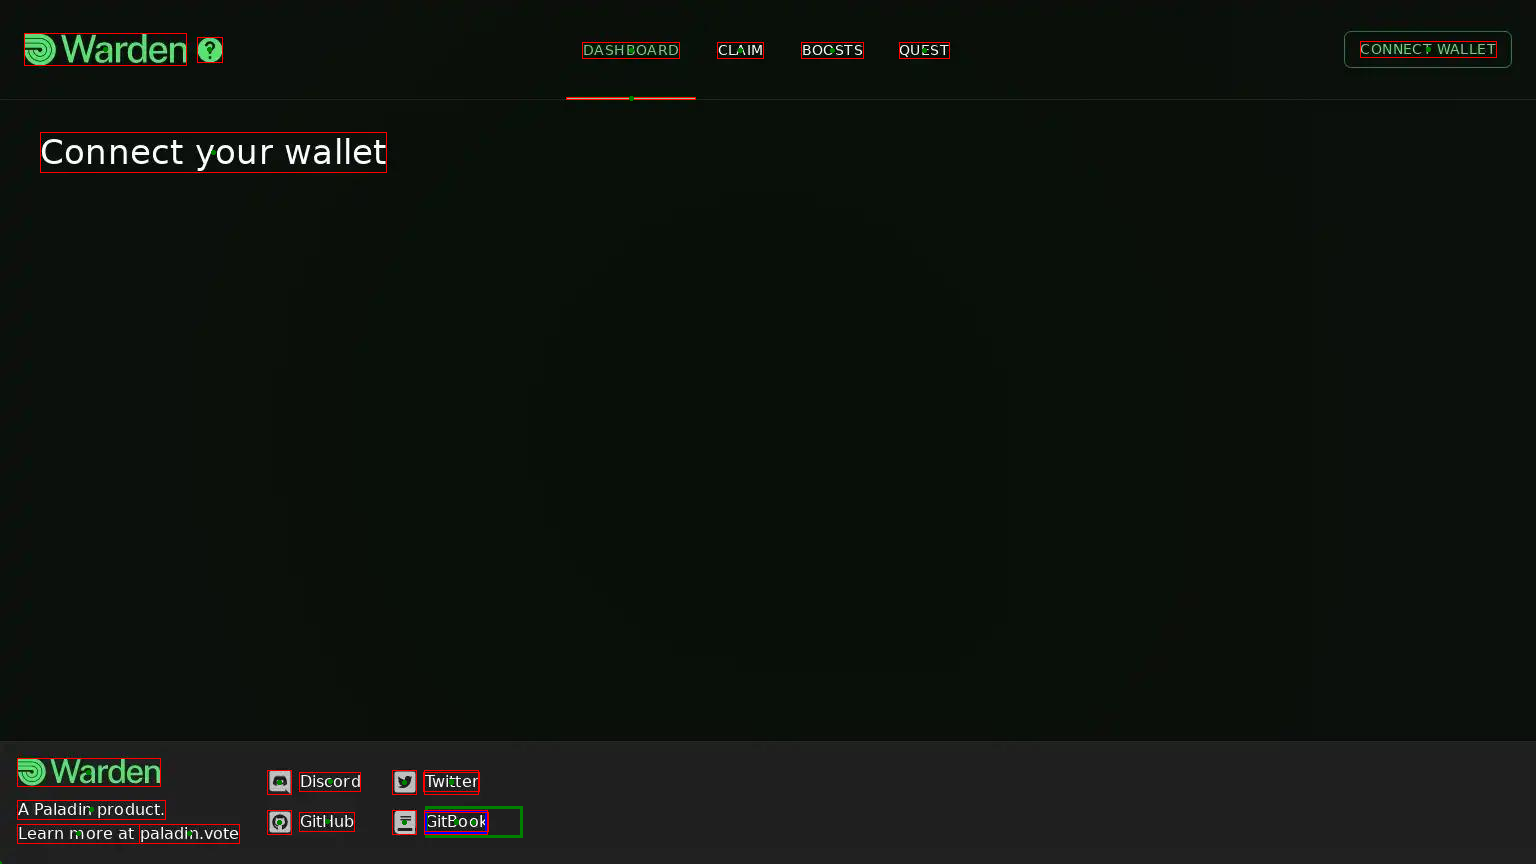

In [ ]:
from IPython.display import display

display(image)